# Step 3: Correlation Matrix 🔢

The goal of this step is to **assess the correlation between input variables**. Highly correlated variables can sometimes lead to issues in certain models, especially those sensitive to multicollinearity.  

In my case, I am using a **MaxEnt model**, which has built-in mechanisms to handle collinearity. Therefore, this step is not strictly necessary for the model, but it is still useful to explore the relationships between variables and is essential for other modeling approaches.

#### 📚 Required Libraries
To calculate and visualize the correlation matrix, the following libraries are needed:

- **`geopandas`**: To load and manipulate spatial datasets.
- **`pandas`**: To handle tabular data and calculate correlations.
- **`matplotlib`**: To plot the correlation matrix.
- **`seaborn`**: To create a visually clear heatmap of the correlations.

### 🛠️ Steps:
1. **Load the Input Variables**: 
   - Open all resampled datasets and prepare them for correlation analysis.

2. **Calculate the Correlation Matrix**: 
   - Use the **`pandas` `.corr()`** method to compute pairwise correlations between variables.

3. **Visualize the Correlation Matrix**: 
   - Plot a **heatmap** using `seaborn` to easily identify highly correlated variables.


### 🔢 Calcul of the Correlation Matrix and filtering of the inputs

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the files
clipped_grid_4326 = gpd.read_file("data/clipped_grid_4326_resampled.geojson")
clipped_grid_4326

,mean_bathymetry,chl_surface,chl,no3,nppv,o2,ph,po4,zsd,bottomT,...,vo,VHM0,VTPK,VHM0_SW2,VTM01_SW2,VSDX,VSDY,VMXL,VCMX,geometry
0,-459.075317,1.315495,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03034 58.25918, 10.03459 58.25935..."
1,-462.190002,1.315495,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03003 58.26142, 10.03428 58.26158..."
2,-466.197754,1.315495,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02972 58.26366, 10.03396 58.26382..."
3,-471.135791,1.315495,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.0294 58.26589, 10.03365 58.26606,..."
4,-475.315869,1.315495,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02909 58.26813, 10.03334 58.26829..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240351,NaN,2.017805,2.017805,4.840452,5646.053711,335.755066,8.171505,0.337169,8.854092,11.165191,...,0.015324,0.214206,2.066993,0.002324,2.790750,0.024698,0.016682,0.214038,0.353075,"POLYGON ((13.05616 55.68358, 13.06013 55.68364..."
240352,-0.300009,1.999801,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06113 55.66344, 13.0651 55.6635, ..."
240353,-0.300089,1.999801,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06102 55.66568, 13.06499 55.66575..."
240354,-0.320632,1.999801,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06091 55.66793, 13.06488 55.66799..."


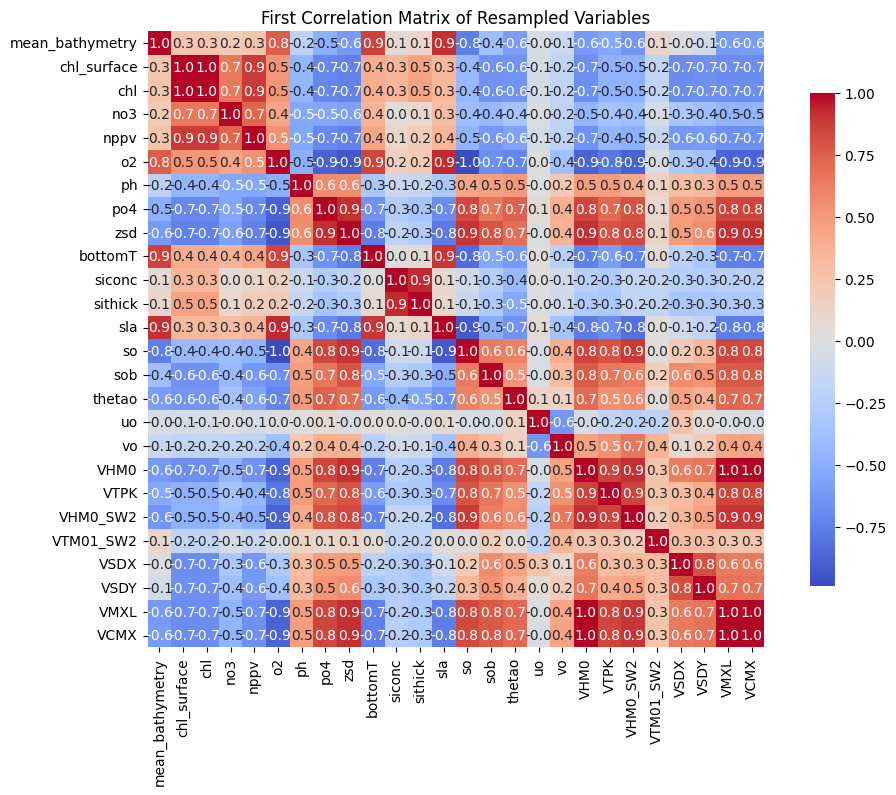

In [12]:
# Calculate the correlation matrix without the geometry column
correlation_matrix = clipped_grid_4326.drop(columns=['geometry']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('First Correlation Matrix of Resampled Variables')
plt.show()



The goal is to have values between -0,8 and 0,8. If the correlation index of 2 variables is higher than 0,8 in absolute value, it means the 2 variables are highly correlated. Correlated values are useless as input of a model, that's why I need to delete one of them. For example the last variable `'VCMX'` is highly correlated to `'chl', 'o2', 'zsd', 'bottomT', 'sla', 'so', 'VHM0', 'VTPK', 'VHM0_SW2', 'VSDX', 'VSDY', 'VMXL'`. That's why I will not use it as an input of my model. Let's check each variable and plot a better matrix.

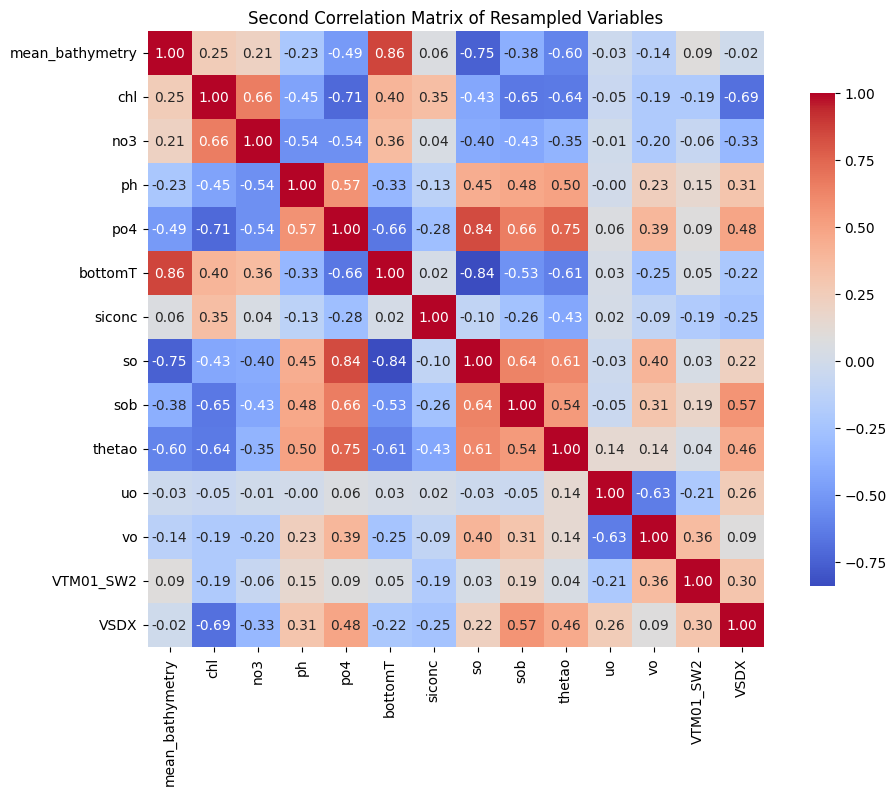

In [19]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'chl_surface','VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Second Correlation Matrix of Resampled Variables')
plt.show()

`'bottomT'` (bottom temperature) is highly correlated with `'so'`(salinity) and `'mean_bathymetry'`. It is difficult to choose between them but I will keep the bathymetry because the salinity is correlated to `'po4'` (phosphate consentration) and to the bottom temperature.

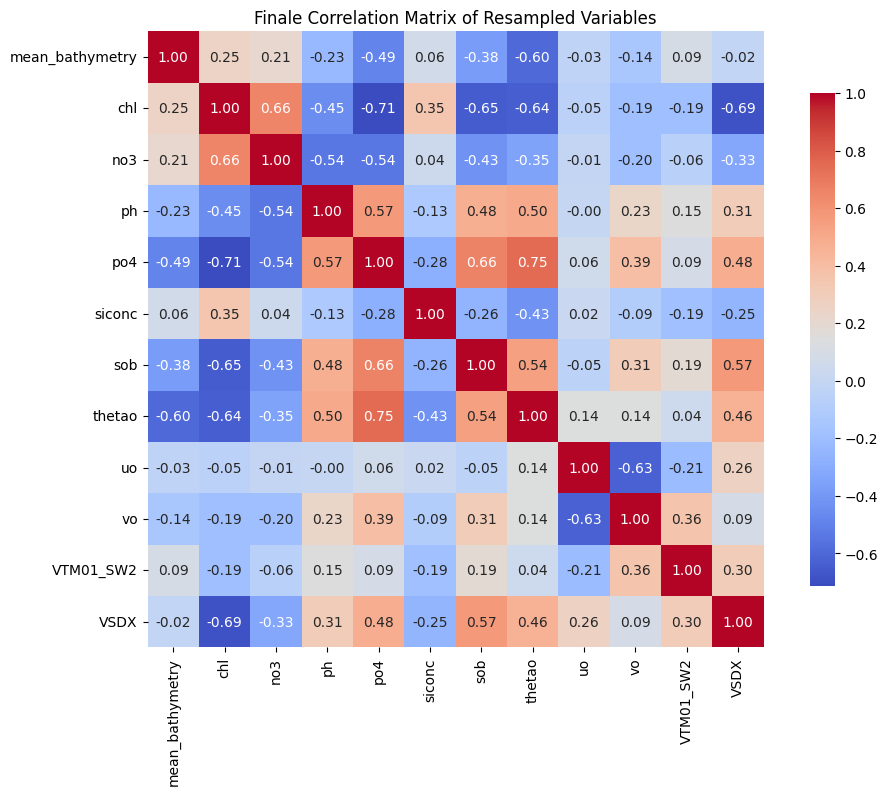

In [17]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'chl_surface','VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK','so','bottomT']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Finale Correlation Matrix of Resampled Variables')
plt.show()

The inputs variables are now non correlated. let's save them.

In [18]:
# Save the final variables inputs to a CSV file
inputs_variables = clipped_grid_4326.drop(columns=['VCMX', 'chl_surface','nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK','so','bottomT'])
inputs_variables.to_csv("data/02_inputs_environmental_variables.csv", index=False)